In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

/opt/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
def sigma(x):
    return 1./(1. + np.exp(-x))

In [5]:
class RBM:
    def __init__(self, input_size=784, hidden_size=100):
        xavier_range = np.sqrt(6.0/(input_size + hidden_size))
#         self.W = np.random.uniform(-xavier_range, xavier_range, (input_size, hidden_size))
        self.W = np.random.rand(input_size, hidden_size) * 0.5
        self.b = np.zeros((1,hidden_size))
        self.a = np.zeros((1,input_size))
        self.input_size = input_size
        self.hidden_size = hidden_size
    
    def front_propagation(self, input_visible):
        activated_hidden = sigma(np.matmul(input_visible, self.W) + self.b)
        rand_array = np.random.rand(activated_hidden.shape[0], activated_hidden.shape[1])
        h = (activated_hidden > rand_array).astype('int')
        return h
    
    def back_propagation(self, input_hidden):
        return sigma(np.matmul(input_hidden, np.transpose(self.W)) + self.a)
        
    
    def train(self, X, learning_rate=0.001, generating=False):
        number_of_data = X.shape[0]
        h = self.front_propagation(X)
        
        if generating:
            random_seed = np.random.randn(int(number_of_data/4), self.input_size)
            temp_1 = self.back_propagation(self.front_propagation(random_seed))
            temp_2 = self.back_propagation(self.front_propagation(temp_1))
            temp_3 = self.back_propagation(self.front_propagation(temp_2))
            temp_4 = self.back_propagation(self.front_propagation(temp_3))
            self.X1 = np.concatenate((temp_1, temp_2, temp_3, temp_4), axis=0)
        
        h1 = self.front_propagation(self.X1)
        
    
        dW = np.matmul(np.transpose(X), h) - np.matmul(np.transpose(self.X1), h1)
        db = np.sum(h - h1, axis=0, keepdims=True)
        da = np.sum(X - self.X1, axis=0, keepdims=True)
        
        self.W += learning_rate * dW / number_of_data
        self.b += learning_rate * db / number_of_data
        self.a += learning_rate * da / number_of_data

        error = np.mean(np.sum((X - self.X1) ** 2, axis=1))
        self.X1 = self.back_propagation(h1)
        
        return error
        
        
    def generate_images(self, number_of_images=20, n_step=200):
        hidden = np.round(np.random.rand(number_of_images, self.hidden_size))
        for i in range(n_step):
            visible = self.back_propagation(hidden)
            hidden = self.front_propagation(visible)
        return visible
    
    def generate_hidden(self, X, n_step=200):
        visible = X
        for i in range(n_step):
            hidden = self.front_propagation(visible)
            visible = self.back_propagation(hidden)
        return hidden

In [7]:
model = RBM(hidden_size =25)

In [8]:
BATCH_SIZE = 100
TRAINING_EPOCHS = 50

In [9]:
for epoch in range(TRAINING_EPOCHS):
    total_batch = int(mnist.train.num_examples / BATCH_SIZE)
    total_error = 0
    check = True
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        total_error += model.train(batch_xs, generating=check)/total_batch
        if check:
            check = False
    print('Epoch: ' + str((epoch + 1)) + ': ' + str(total_error) )

print('Learning Finished!')

Epoch: 1: 341.845280088
Epoch: 2: 115.900516079
Epoch: 3: 102.633271652
Epoch: 4: 91.7306886465
Epoch: 5: 82.6839194477
Epoch: 6: 75.8958324618
Epoch: 7: 70.0992730399
Epoch: 8: 76.479532791
Epoch: 9: 65.2062903675
Epoch: 10: 64.5154714378
Epoch: 11: 62.8738037515
Epoch: 12: 64.1353198739
Epoch: 13: 59.5352187071
Epoch: 14: 63.2458914192
Epoch: 15: 58.2203619328
Epoch: 16: 58.8278431914
Epoch: 17: 58.1008056653
Epoch: 18: 63.4976449446
Epoch: 19: 60.3407868521
Epoch: 20: 57.6398887763
Epoch: 21: 59.2785531693
Epoch: 22: 57.9874193075
Epoch: 23: 61.7063141103
Epoch: 24: 59.0436355112
Epoch: 25: 58.5650603708
Epoch: 26: 59.8190680989
Epoch: 27: 58.2791826342
Epoch: 28: 59.1712776422
Epoch: 29: 62.6215551545
Epoch: 30: 62.9911620852
Epoch: 31: 60.7399056131
Epoch: 32: 60.3879634583
Epoch: 33: 61.266403215
Epoch: 34: 61.0215899787
Epoch: 35: 60.8753938369
Epoch: 36: 60.9428211399
Epoch: 37: 61.2009324337
Epoch: 38: 60.677872132
Epoch: 39: 61.24095221
Epoch: 40: 61.0583451192
Epoch: 41: 61.

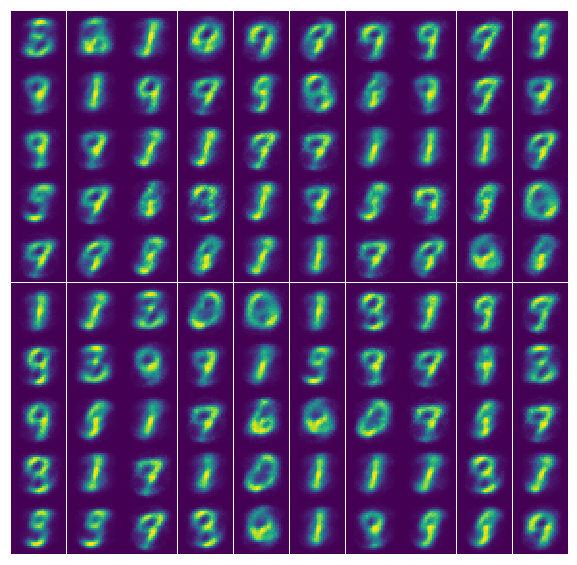

In [11]:
reshaped_images = np.reshape(model.generate_images(number_of_images=100, n_step=1000), (-1, 28, 28))
# for image in reshaped_images:
#     plt.imshow(image, cmap='gray')
#     plt.show()
f, axarr = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axarr[i, j].imshow(reshaped_images[i*10 + j])
        axarr[i, j].axis('off')
        axarr[i, j].set_xticklabels([])
        axarr[i, j].set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [12]:
hidden_array = []
for i in range(total_batch):
    images = mnist.train.next_batch(BATCH_SIZE)[0]
    hidden = sigma(np.matmul(images, model.W) +  model.b)
    hidden = (hidden > 0.5).astype('int')
    hidden_array.append(hidden)
hidden_array = np.concatenate(hidden_array).tolist()
hidden_string_array = []
for data in hidden_array:
    string = ''
    for row in data:
        string += str(row)
    hidden_string_array.append(string)
from collections import Counter
counter = Counter(hidden_string_array)
p_x = np.array(list(counter.values()))/len(hidden_array)
entropy_h = np.sum(-p_x * np.log(p_x))

counter_2 = Counter(counter.values())
p_x2 = np.array([k*v/len(hidden_array) for k, v in counter_2.items()])
entropy_k = np.sum(-p_x2 * np.log(p_x2))
entropy_h, entropy_k

(6.3284823108850015, 5.0549113671092964)